In [68]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [69]:
data=pd.read_csv('Bengaluru_House_Data.csv')
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [71]:
data['society'].unique()

array(['Coomee ', 'Theanmp', nan, ..., 'SJovest', 'ThhtsV ', 'RSntsAp'],
      dtype=object)

In [72]:
data['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [73]:
len(data['location'].unique())

1306

In [74]:
data['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [75]:
data['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

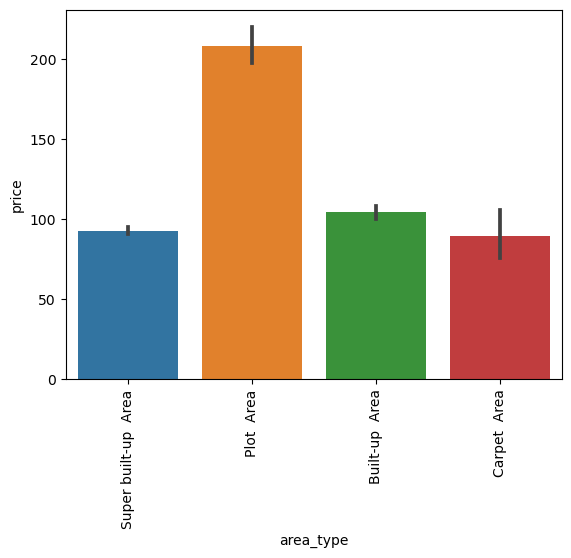

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=data['area_type'],y=data['price'])
plt.xticks(rotation='vertical')
plt.show()

In [77]:
data=data[data['area_type']!='Carpet  Area']

In [78]:
data.drop(columns=['society','availability','location'],inplace=True)
data.head()

,area_type,size,total_sqft,bath,balcony,price
0,Super built-up Area,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,2 BHK,1200,2.0,1.0,51.00


In [79]:
data.isnull().sum()

area_type       0
size           16
total_sqft      0
bath           73
balcony       604
price           0
dtype: int64

In [80]:
data.shape

(13233, 6)

In [81]:
data.dropna(inplace=True)
data.shape

(12629, 6)

In [82]:
data.duplicated().sum()

1316

In [83]:
data.drop_duplicates(inplace=True)
data.shape

(11313, 6)

In [84]:
data['size']=data['size'].str.slice(0,1).astype(int)
data.head()

,area_type,size,total_sqft,bath,balcony,price
0,Super built-up Area,2,1056,2.0,1.0,39.07
1,Plot Area,4,2600,5.0,3.0,120.00
2,Built-up Area,3,1440,2.0,3.0,62.00
3,Super built-up Area,3,1521,3.0,1.0,95.00
4,Super built-up Area,2,1200,2.0,1.0,51.00


In [85]:
data['bath']=data['bath'].astype(int)
data['balcony']=data['balcony'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11313 entries, 0 to 13318
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   11313 non-null  object 
 1   size        11313 non-null  int32  
 2   total_sqft  11313 non-null  object 
 3   bath        11313 non-null  int32  
 4   balcony     11313 non-null  int32  
 5   price       11313 non-null  float64
dtypes: float64(1), int32(3), object(2)
memory usage: 486.1+ KB


In [86]:
data.head()

,area_type,size,total_sqft,bath,balcony,price
0,Super built-up Area,2,1056,2,1,39.07
1,Plot Area,4,2600,5,3,120.00
2,Built-up Area,3,1440,2,3,62.00
3,Super built-up Area,3,1521,3,1,95.00
4,Super built-up Area,2,1200,2,1,51.00


In [87]:
data['area_type'].value_counts()

Super built-up  Area    7419
Built-up  Area          2184
Plot  Area              1710
Name: area_type, dtype: int64

In [88]:
data['area_type']=data['area_type'].replace('Super built-up  Area',0).replace('Built-up  Area',1).replace('Plot  Area',2)
data.head()

,area_type,size,total_sqft,bath,balcony,price
0,0,2,1056,2,1,39.07
1,2,4,2600,5,3,120.00
2,1,3,1440,2,3,62.00
3,0,3,1521,3,1,95.00
4,0,2,1200,2,1,51.00


In [89]:
data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [97]:
data=data[data['total_sqft'].str.isnumeric()==True]

In [99]:
data.head()

,area_type,size,total_sqft,bath,balcony,price
0,0,2,1056,2,1,39.07
1,2,4,2600,5,3,120.00
2,1,3,1440,2,3,62.00
3,0,3,1521,3,1,95.00
4,0,2,1200,2,1,51.00


In [98]:
data['total_sqft']=data['total_sqft'].astype(int)

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11059 entries, 0 to 13318
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   11059 non-null  int64  
 1   size        11059 non-null  int32  
 2   total_sqft  11059 non-null  int32  
 3   bath        11059 non-null  int32  
 4   balcony     11059 non-null  int32  
 5   price       11059 non-null  float64
dtypes: float64(1), int32(4), int64(1)
memory usage: 432.0 KB


<AxesSubplot:xlabel='total_sqft', ylabel='price'>

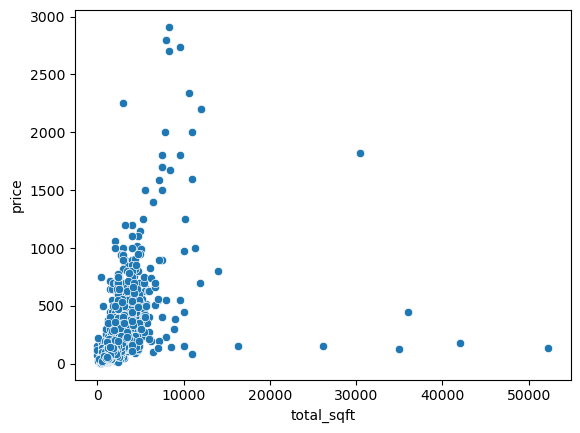

In [101]:
sns.scatterplot(x=data['total_sqft'],y=data['price'])

In [103]:
data=data[data['total_sqft']<20000]

In [104]:
data.corr()['price']

area_type     0.258966
size          0.410751
total_sqft    0.724040
bath          0.448829
balcony       0.116127
price         1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Density'>

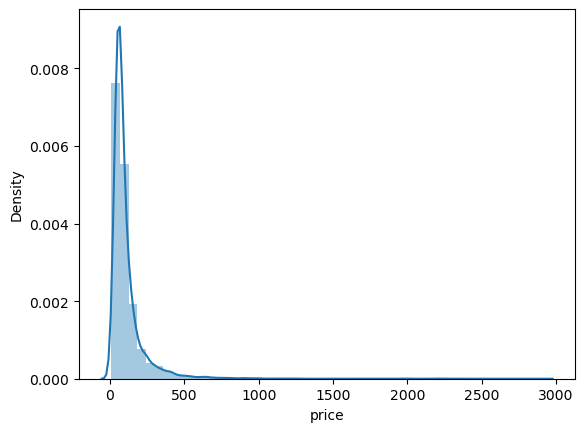

In [105]:
sns.distplot(data['price'])

<AxesSubplot:xlabel='price', ylabel='Density'>

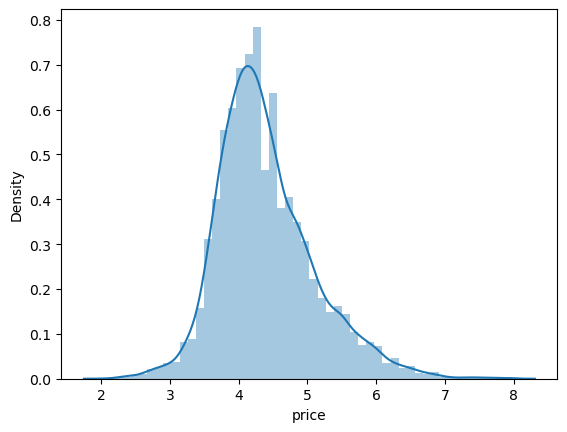

In [106]:
sns.distplot(np.log(data['price']))

In [107]:
data.describe()

,area_type,size,total_sqft,bath,balcony,price
count,11053.000000,11053.000000,11053.000000,11053.000000,11053.000000,11053.000000
mean,0.499864,2.765674,1520.121144,2.655297,1.608251,110.382592
std,0.744825,1.135942,878.129808,1.262315,0.818142,137.721835
min,0.000000,1.000000,5.000000,1.000000,0.000000,8.000000
25%,0.000000,2.000000,1100.000000,2.000000,1.000000,50.000000
50%,0.000000,3.000000,1286.000000,2.000000,2.000000,72.000000
75%,1.000000,3.000000,1665.000000,3.000000,2.000000,120.000000
max,2.000000,9.000000,16335.000000,40.000000,3.000000,2912.000000


In [108]:
data['size'].value_counts()

2    4588
3    4122
4    1141
1     556
5     280
6     185
7      83
8      66
9      32
Name: size, dtype: int64

<AxesSubplot:xlabel='size', ylabel='price'>

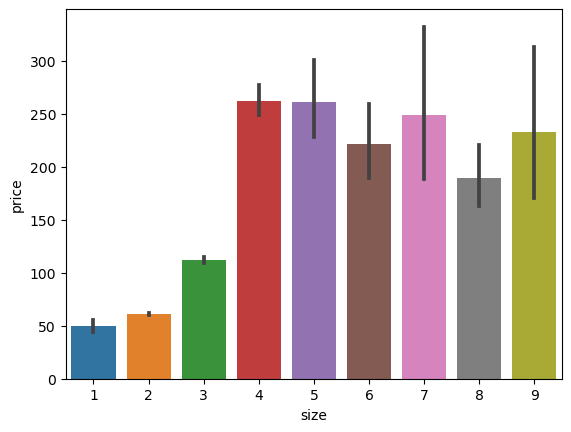

In [109]:
sns.barplot(x=data['size'],y=data['price'])

<AxesSubplot:xlabel='size', ylabel='price'>

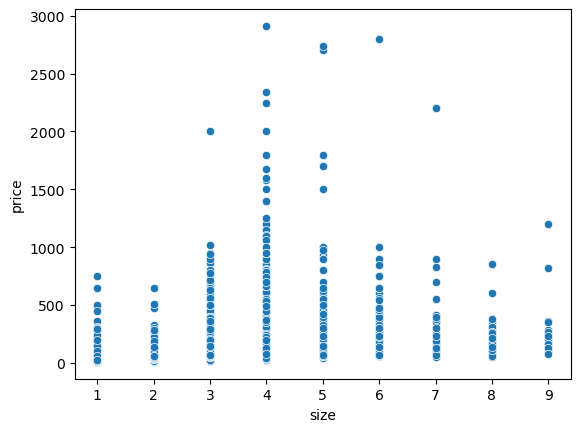

In [110]:
sns.scatterplot(x=data['size'],y=data['price'])

In [111]:
data['bath'].value_counts()

2     5767
3     2818
4     1011
1      673
5      404
6      221
7       81
8       41
9       25
10       6
27       1
11       1
12       1
40       1
15       1
13       1
Name: bath, dtype: int64

In [112]:
data=data[data['bath']<10]

<AxesSubplot:xlabel='bath', ylabel='price'>

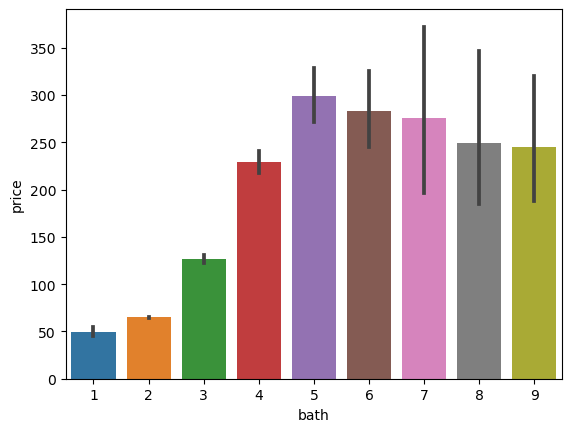

In [113]:
sns.barplot(x=data['bath'],y=data['price'])

In [114]:
data=data[data['size']<6]
data=data[data['size']<6]
data.shape

(10681, 6)

In [115]:
data['balcony'].value_counts()

2    4277
1    4202
3    1448
0     754
Name: balcony, dtype: int64

<AxesSubplot:xlabel='balcony', ylabel='price'>

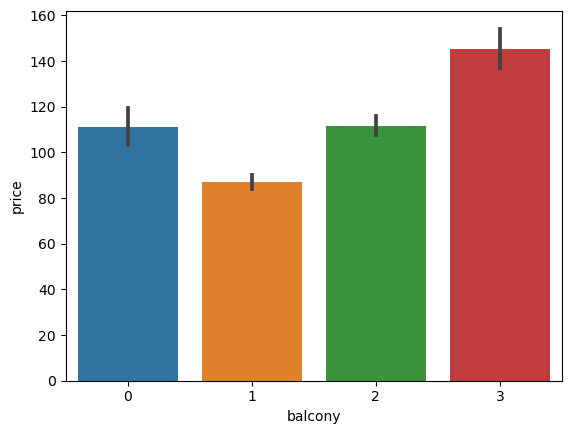

In [116]:
sns.barplot(x=data['balcony'],y=data['price'])

In [117]:
data['area_type'].value_counts()

0    7179
1    2079
2    1423
Name: area_type, dtype: int64

In [118]:
data.describe()

,area_type,size,total_sqft,bath,balcony,price
count,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000
mean,0.461099,2.626346,1501.774834,2.524108,1.600974,106.437673
std,0.717628,0.841556,836.436740,0.946017,0.807581,130.068514
min,0.000000,1.000000,11.000000,1.000000,0.000000,8.000000
25%,0.000000,2.000000,1100.000000,2.000000,1.000000,50.000000
50%,0.000000,3.000000,1284.000000,2.000000,2.000000,70.000000
75%,1.000000,3.000000,1650.000000,3.000000,2.000000,115.000000
max,2.000000,5.000000,16335.000000,9.000000,3.000000,2912.000000


In [119]:
data.to_csv('cleaned_house_price_data2.csv')

In [121]:
x = data.drop(columns=['price'])
y = np.log(data['price'])

In [122]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15)

In [123]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((9078, 5), (1603, 5), (9078,), (1603,))

In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(r2_score(y_test,y_pred))

0.6479972699570511


In [125]:
scores=[]
for i in range(5000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    scores.append(r2_score(y_test,y_pred))

In [132]:
scores.index(max(scores))

1534

In [133]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=1534)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(r2_score(y_test,y_pred))

0.720478167842836


In [134]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [135]:
from sklearn.metrics import r2_score,mean_absolute_error

In [136]:
ri=Ridge(alpha=10)
la=Lasso(alpha=0.001)
kn=KNeighborsRegressor(n_neighbors=3)
dt=DecisionTreeRegressor(max_depth=5)
sv=SVR(kernel='rbf',C=10000,epsilon=0.1)
rf=RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)
et=ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_features=0.75,
                              max_depth=15)
ab=AdaBoostRegressor(n_estimators=15,learning_rate=1.0)
gb=GradientBoostingRegressor(n_estimators=500)
xg=XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

In [137]:
rgs = {
    'SVR' : sv,
    'KN' : kn,  
    'DT': dt, 
    'LR': lr, 
    'RF': rf, 
    'AdaBoost': ab, 
    'GBR':gb,
    'XGB':xg,
    'RI':ri,
    'LA':la,
    'ETR':et
}

In [138]:
def train_regressor(reg,x_train,y_train,x_test,y_test):
    reg.fit(x_train,y_train)
    y_pred = reg.predict(x_test)
    R2_score = r2_score(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    
    return R2_score,mae

In [139]:
R2_scores = []
MAE_scores = []

for name,reg in rgs.items():
    
    current_r2,current_mae = train_regressor(reg, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("R2_score - ",current_r2)
    print("MAE - ",current_mae)
    
    R2_scores.append(current_r2)
    MAE_scores.append(current_mae)

For  SVR
R2_score -  0.7493692063465165
MAE -  0.26482868552231764
For  KN
R2_score -  0.7032497681146392
MAE -  0.2843138309750779
For  DT
R2_score -  0.7558013654903722
MAE -  0.26345365668172716
For  LR
R2_score -  0.720478167842836
MAE -  0.28325772359096596
For  RF
R2_score -  0.7544583079260511
MAE -  0.2565203000737306
For  AdaBoost
R2_score -  0.6704371843130841
MAE -  0.3027976929599896
For  GBR
R2_score -  0.7745335882051144
MAE -  0.25009319045315137
For  XGB
R2_score -  0.7617466144452952
MAE -  0.2561660123047983
For  RI
R2_score -  0.7204867316146009
MAE -  0.283250754197198
For  LA
R2_score -  0.7204522052119582
MAE -  0.28314907705157416
For  ETR
R2_score -  0.7375060665548003
MAE -  0.2629538092238353


In [140]:
import pickle

pickle.dump(data,open('data.pkl','wb'))
pickle.dump(gb,open('GBR.pkl','wb'))

In [141]:
df=data.copy()
df.head()

,area_type,size,total_sqft,bath,balcony,price
0,0,2,1056,2,1,39.07
1,2,4,2600,5,3,120.00
2,1,3,1440,2,3,62.00
3,0,3,1521,3,1,95.00
4,0,2,1200,2,1,51.00


In [143]:
df['area_type'].value_counts()

0    7179
1    2079
2    1423
Name: area_type, dtype: int64

In [145]:
df1=df[df['area_type']==0].sample(1400)
df2=df[df['area_type']==1].sample(1400)
df3=df[df['area_type']==2].sample(1400)
fin_df=pd.concat([df1,df2,df3])
fin_df=fin_df.sample(4200)
fin_df=fin_df.reset_index(drop=True)
fin_df.head()

,area_type,size,total_sqft,bath,balcony,price
0,2,5,1200,4,3,150.0
1,0,1,585,1,1,21.0
2,1,3,1942,3,2,102.0
3,2,2,900,2,1,48.0
4,1,4,3800,3,3,325.0


In [146]:
X = data.drop(columns=['price'])
Y = np.log(data['price'])

In [147]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,stratify=df['area_type'],test_size=0.20)

In [150]:
scores=[]
for i in range(5000):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,stratify=df['area_type'],test_size=0.2,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    scores.append(r2_score(y_test,y_pred))

In [151]:
scores.index(max(scores))

308

In [152]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,stratify=df['area_type'],test_size=0.2,random_state=308)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(r2_score(y_test,y_pred))

0.7004354221300122


In [153]:
R2_scores = []
MAE_scores = []

for name,reg in rgs.items():
    
    current_r2,current_mae = train_regressor(reg, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("R2_score - ",current_r2)
    print("MAE - ",current_mae)
    
    R2_scores.append(current_r2)
    MAE_scores.append(current_mae)

For  SVR
R2_score -  0.7350293335492382
MAE -  0.27632575954490096
For  KN
R2_score -  0.7107742427163773
MAE -  0.2879500172228927
For  DT
R2_score -  0.7410579032128211
MAE -  0.2726411269553143
For  LR
R2_score -  0.7004354221300122
MAE -  0.3023296676650969
For  RF
R2_score -  0.7638795409237258
MAE -  0.26106749237970933
For  AdaBoost
R2_score -  0.6661743168439653
MAE -  0.3199967102319499
For  GBR
R2_score -  0.7672871321569463
MAE -  0.25771794904608053
For  XGB
R2_score -  0.7631253482986269
MAE -  0.25931941548744397
For  RI
R2_score -  0.7004320026644891
MAE -  0.302327033831466
For  LA
R2_score -  0.7004707159099788
MAE -  0.3022479970815052
For  ETR
R2_score -  0.7509380613574781
MAE -  0.26583512878533916
